# Example of not understood behaviours

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline 

## Fitting with packed parameters `*pars` as function argument

In this section, we try to fit pseudo-data using a generic polynom function using packing/unpacking technics to pass an arbitrary number of coefficient `*pars` (or degree of the polynom). The first function is the general one *for which the fit doesn't work* while the second one is the simple one *for which the fit works*.

In [2]:
def pol2(x, a, b, c):
    return a + b*x + c*x**2

def pol_func(x, *pars):
    a = np.array([pars[i]*x**i for i in range(len(pars))])
    return np.sum(a)

Now we can use these function fit pseudo-data, which are created here:

In [3]:
Nmeas, Npoints = 10, 1000
xcont = np.linspace(0.0, 3.5, Npoints)
xmeas = np.linspace(0.0, 3.5, Nmeas)
ymeas = 1.5*(np.sin(xmeas) + np.random.random(Nmeas)*0.3)
dymeas = 0.05+0.3*ymeas

Then we compare the fit optained using `pol2` and with `pol_func` where the number of parameters to minimize is determined using the initial paramters argument `p0 = [1, 1, 1]`. The first case give the proper result while the second case simply doesn't work, and no message is given:

In [4]:
# Initial and bounds parmaters
p0, pmin, pmax = [1.0]*3, [-10]*3, [10]*3
fit_options = {'p0': p0, 'bounds': (pmin, pmax), 'check_finite': True}

# Fit with pol2 -> OK
par1, cov1 = optimize.curve_fit(pol2, xmeas, ymeas, sigma=dymeas/ymeas, **fit_options)
print('\n Without packing arguments:')
print(par1)
print(cov1)
      
# Fit wit pol_func -> not OK
par2, cov2 = optimize.curve_fit(pol_func, xmeas, ymeas, sigma=dymeas/ymeas, **fit_options)
print('\n With packing arguments:')
print(par2)
print(cov1)


 Without packing arguments:
[ 0.41351655  1.56596611 -0.50060252]
[[ 0.02862008 -0.0303687   0.00674572]
 [-0.0303687   0.04491424 -0.01145391]
 [ 0.00674572 -0.01145391  0.00315744]]

 With packing arguments:
[0.01453653 0.01489822 0.01481645]
[[ 0.02862008 -0.0303687   0.00674572]
 [-0.0303687   0.04491424 -0.01145391]
 [ 0.00674572 -0.01145391  0.00315744]]


The best values obtained in each case is totally different and we can simply see which one works by plotting the result:

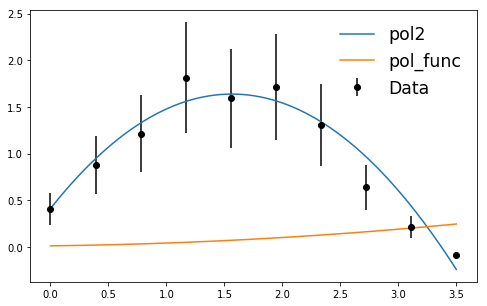

In [6]:
plt.figure(figsize=(8,5))
plt.errorbar(xmeas, ymeas, yerr=dymeas, marker='o', color='black', linestyle='', label='Data')
plt.plot(xcont, pol2(xcont, *par1), label='pol2')
plt.plot(xcont, [pol_func(v, *par2) for v in xcont], label='pol_func')
plt.legend(frameon=False, fontsize='xx-large');